ROHAN SARASWAT
NLP-LAB ASSIGNMENT-2
PRN- 21070126071


In [ ]:
# Importing Neccessary Libraries
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.4 MB/s eta 0:00:00


In [ ]:
nltk.download("all")
!python -m spacy download en_core_web_sm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

2023-08-25 14:51:49.684124: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/DATASETS/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
len(data)

50000

In [ ]:
# Preprocessing The DATA:
# Droping Null values
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [ ]:
len(data)

49582

In [ ]:
# Cleaning:
#Regular Expression
regexp = RegexpTokenizer("[\w']+")
#Lowercase
def text_lower(text):
  text = text.lower()
  return text

#Remove Whitespace
def remove_whitespace(text):
  text = text.strip()
  return text

#Remove Punctuation
def remove_punctuation(text):
  punct = string.punctuation
  punct = punct.replace("'","")
  text = text.translate(str.maketrans("", "",punct))
  return text


#Remove HTML
def remove_html(text):
  html = re.compile(r'<.*?>')
  text = html.sub(r'',text)
  return text

# Removing emojis
def remove_emoji(text):
  emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F" # emoticons
  u"\U0001F300-\U0001F5FF" # symbols & pictographs
  u"\U0001F680-\U0001F6FF" # transport & map symbols
  u"\U0001F1E0-\U0001F1FF" # flags
  u"\U00002702-\U000027B0"
  u"\U000024C2-\U0001F251"
  "]+",flags=re.UNICODE
  )
  text = emoji_pattern.sub(r'',text)
  return text

#Remove URLS
def remove_http_links(text):
  text = re.sub('http://\S+|https://\S+','',text)
  return text



In [ ]:
# Importing abbrivation file
abbrev= pd.read_csv("/content/drive/MyDrive/DATASETS/abbrevations.csv",names=['SMF','FF'])
abbrev.head()

,SMF,FF
0,?,I have a question
1,?,I don’t understand what you mean
2,?4U,I have a question for you
3,;S,GeHmm? What did you say?
4,^^,read message


In [ ]:
abbrev_lower = pd.DataFrame()
abbrev_lower['SMF'] = abbrev['SMF'].apply(text_lower)
abbrev_lower['FF'] = abbrev['FF'].apply(text_lower)
abbrev_dict = dict(zip(list(abbrev_lower.SMF), list(abbrev_lower.FF)))
abbrev_words = list(abbrev_dict.keys())

In [ ]:
def convert_abbrev(text):
  words = []
  for word in regexp.tokenize(text):
    if word in abbrev_words:
      words = words + abbrev_dict[word].split()
    else:
      words = words + word.split()

  text_converted = " ".join(words)

  return text_converted

In [ ]:
#Convert Contractions like you're
def convert_contractions(text):
  text = contractions.fix(text)
  return text

In [ ]:
 #Remove Stopwords
def remove_stopwords(text):
  text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word
  not in stopwords.words('english')])
  return text

In [ ]:
#Lemmatization
# Lemmatization
nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
def lemmatize(text):
  text = " ".join([token.lemma_ for token in nlp(text)])
  return text

In [ ]:
#Remove Non-Alphabetic Characters
def discard_non_alpha(text):
  word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
  text = " ".join(word_list_non_alpha)
  return text

In [ ]:
def text_clean(text):
  text = text_lower(text)
  text = remove_whitespace(text)
  text = re.sub('\n' , '', text)
  text = re.sub('\[.*?\]', '', text)
  text = remove_http_links(text)
  text = remove_punctuation(text)
  text = remove_html(text)
  text = remove_emoji(text)
  text = convert_abbrev(text)
  text = convert_contractions(text)
  text = remove_stopwords(text)
  text = discard_non_alpha(text)
  text = lemmatize(text)

  return text

In [ ]:
#  Applying on DataSet
data['review_Clean'] = data['review'].apply(text_clean)
data.head()

,review,sentiment,review_Clean
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch oz episode hook acr...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production good regard good r...
2,I thought this was a wonderful way to spend ti...,positive,think wild guess wonderful way spend time hot ...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [ ]:
le = LabelEncoder()
data['Encoded_Labels'] = le.fit_transform(data['sentiment'])
inv_labels = le.inverse_transform([0,1])
label_len = len(le.classes_)
data.head()

,review,sentiment,review_Clean,Encoded_Labels
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch oz episode hook acr...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production good regard good r...,1
2,I thought this was a wonderful way to spend ti...,positive,think wild guess wonderful way spend time hot ...,1
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,1


In [ ]:
# Data Spliting:
X_train, X_test, y_train, y_test = train_test_split(
data.review_Clean,
data.Encoded_Labels,
stratify=data.Encoded_Labels,
random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [ ]:
batch_size = 4
max_words = 10000
max_len = 50
embedding_dim = 50
lstm_units = 32

In [ ]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)


In [ ]:
seq_matrix[0]

array([3771, 1110,  107,  592,  162,  532,   81, 1371,  608,   23,   49,
       2445,   50, 1450, 3843,    1,    2,   77,  147,  284,    6,    1,
        408,  142,   32, 1059,  351,  323,  510,  243,  902,  250, 8397,
         70,    1,   58, 8820,  445,  184, 2748,  736,   88,   16,    3,
         18, 7433,  462,  112,  330,  213], dtype=int32)

In [ ]:
# Model building
def LSTM_Model(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words, output_dim=dim, input_length=len))
  model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(num_labels, activation='softmax'))
  model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])
  return model

In [ ]:
model = LSTM_Model(max_words,max_len,embedding_dim,lstm_units,label_len)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            500000    
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 510,690
Trainable params: 510,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model fitting
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
7437/7437 [==============================] - 829s 110ms/step - loss: 0.4159 - accuracy: 0.8104 - val_loss: 0.3472 - val_accuracy: 0.8485
Epoch 2/3
7437/7437 [==============================] - 805s 108ms/step - loss: 0.2946 - accuracy: 0.8799 - val_loss: 0.3565 - val_accuracy: 0.8531
Epoch 3/3
7437/7437 [==============================] - 807s 109ms/step - loss: 0.2322 - accuracy: 0.9054 - val_loss: 0.3888 - val_accuracy: 0.8400


In [ ]:
prediction = model.predict(test_seq_matrix)


388/388 [==============================] - 9s 21ms/step


In [ ]:
# Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.argmax(prediction,axis=1),
target_names=inv_labels))

              precision    recall  f1-score   support

    negative       0.85      0.82      0.83      6175
    positive       0.83      0.85      0.84      6221

    accuracy                           0.84     12396
   macro avg       0.84      0.84      0.84     12396
weighted avg       0.84      0.84      0.84     12396



<Axes: >

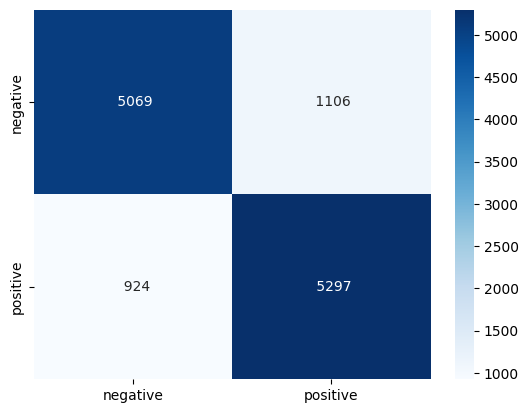

In [ ]:
#  Classification Matrix
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction,axis=1)),
annot=True,fmt='5',cmap='Blues',xticklabels=inv_labels,
yticklabels=inv_labels)

In [ ]:
# So that was the result for first set of results:
# Now through training different sets.
# Using different Parameters

In [ ]:
# Data Spliting:
X_train, X_test, y_train, y_test = train_test_split(
data.review_Clean,
data.Encoded_Labels,
stratify=data.Encoded_Labels,
random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [ ]:
batch_size = 8
max_words = 25000
max_len = 30
embedding_dim = 30
lstm_units = 32

In [ ]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [ ]:
seq_matrix[0]

array([17799,    32,  1059,   351,   323,   510,   243,   902,   250,
        8397,    70,     1,    58,  8820,   445,   184, 20760, 13364,
        2748,   736, 19615,    88,    16,     3,    18,  7433,   462,
         112,   330,   213], dtype=int32)

In [ ]:
# Model building with 2 layers of LSTM
def LSTM_Model_2Layers(words, len, dim, units, num_labels):
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim=words, output_dim=dim, input_length=len))
    model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # First LSTM layer
    model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))  # Second LSTM layer
    model.add(Dense(num_labels, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
model = LSTM_Model(max_words,max_len,embedding_dim,lstm_units,label_len)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 30)            750000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8064      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 758,130
Trainable params: 758,130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
3719/3719 [==============================] - 591s 157ms/step - loss: 0.4573 - accuracy: 0.7817 - val_loss: 0.4166 - val_accuracy: 0.8090
Epoch 2/3
3719/3719 [==============================] - 566s 152ms/step - loss: 0.3188 - accuracy: 0.8640 - val_loss: 0.4216 - val_accuracy: 0.8065
Epoch 3/3
3719/3719 [==============================] - 575s 155ms/step - loss: 0.2358 - accuracy: 0.9050 - val_loss: 0.4778 - val_accuracy: 0.8048


In [ ]:
prediction = model.predict(test_seq_matrix)


388/388 [==============================] - 8s 18ms/step


In [ ]:
# Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.argmax(prediction,axis=1),
target_names=inv_labels))

              precision    recall  f1-score   support

    negative       0.80      0.79      0.80      6175
    positive       0.79      0.81      0.80      6221

    accuracy                           0.80     12396
   macro avg       0.80      0.80      0.80     12396
weighted avg       0.80      0.80      0.80     12396



<Axes: >

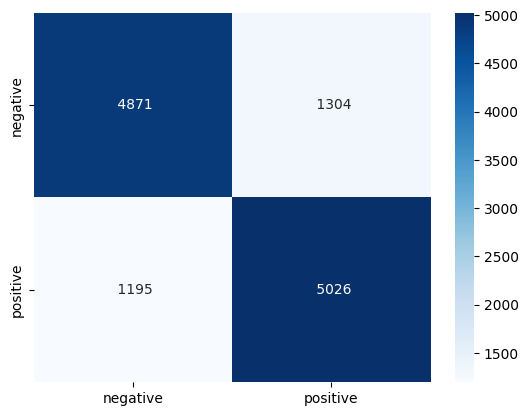

In [ ]:
# Classification Heat Map
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction,axis=1)),
annot=True,fmt='5',cmap='Blues',xticklabels=inv_labels,
yticklabels=inv_labels)

In [ ]:
# So in the observation our first model perfomred well.